# Equal-weighted Portfolio

In [1]:
#-----------------------------------------------------------------------------
# Imports libraries and defines variables 
#-----------------------------------------------------------------------------

# Imports libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

# Parameters
janela_retornos = 252
custo = 0.01

# File Path
str_dir = 'C:/Users/nelly/Desktop/Mestrado Insper/DISSERTAÇÃO/Dissertação/1. Modelo/'

# Returns
str_Retornos = 'Retornos'
    
df_Retornos = pd.read_csv(filepath_or_buffer = str_dir + str_Retornos + '.csv', sep=';')
df_Retornos.index = df_Retornos['Data']
df_Retornos = df_Retornos.drop(columns=['Data'])
df_Retornos = df_Retornos.dropna()
    
df_Retornos['indice']=np.zeros(len(df_Retornos.index))

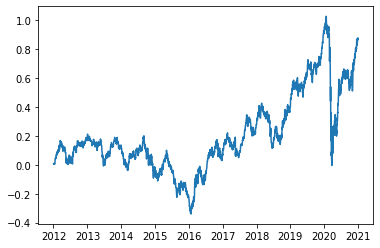

In [2]:
#-----------------------------------------------------------------------------
# Adjusts the dates formats and computes portfolio returns
#-----------------------------------------------------------------------------

# Adjusts the dates formats

for x in range(0,len(df_Retornos.index)):
    df_Retornos.iloc[x,len(df_Retornos.columns)-1] = datetime.datetime(df_Retornos.iloc[x,2],df_Retornos.iloc[x,1], df_Retornos.iloc[x,0])
    
df_Retornos = df_Retornos.drop(columns=['Day', 'Month', 'Year'])
df_Retornos.index = df_Retornos['indice']
df_Retornos = df_Retornos.drop(columns=['indice'])
df_Retornos_disc = np.exp(df_Retornos) - 1

# Computes portfolio returns

n_stocks_total = len(df_Retornos.columns)
df_weights = pd.DataFrame(data = np.zeros([df_Retornos.shape[0], df_Retornos.shape[1]]), 
                          index = df_Retornos.index, columns = df_Retornos.columns)
df_weights_chg = pd.DataFrame(data = np.zeros([df_Retornos.shape[0]-1, df_Retornos.shape[1]]))
t = 0
T = len(df_Retornos)
while t < T:
    if t>0:
        df_Retornos_cum = df_Retornos.iloc[(t-1):(t+1),:].cumsum()
        df_Retornos_cum_disc = np.exp(df_Retornos_cum)
        df_weights_ret = df_Retornos_cum_disc.div(df_Retornos_cum_disc.sum(axis = 1), axis = 0).iloc[1,:]
    df_weights.iloc[t,:] = np.ones(n_stocks_total)/n_stocks_total
    if t == 0:
        df_weights_chg.iloc[t,:] = np.array(df_weights.iloc[t,:])
    else:
        if t < T-1:
            df_weights_chg.iloc[t,:] = np.array(df_weights.iloc[t,:]) - np.array(df_weights_ret)
    t = t + 1

df_Retornos_EW_disc = df_Retornos_disc[df_Retornos_disc.index.isin(df_weights.index)]

#df_ret_port_EW_disc = (df_weights.shift(1).dropna() * df_Retornos_EW_disc.iloc[:-1,:]).sum(axis=1)
df_ret_port_EW_disc = np.array(df_weights.iloc[:-1,:]) * np.array(df_Retornos_EW_disc.iloc[1:,:])
df_ret_port_EW_disc = pd.DataFrame(data = df_ret_port_EW_disc).sum(axis=1)
str_index = df_Retornos_EW_disc.iloc[1:,:].index

df_ret_port_EW_disc = np.array(df_ret_port_EW_disc) - np.array(np.abs(df_weights_chg).sum(axis=1)*custo)

df_ret_port_EW_disc = pd.Series(data = df_ret_port_EW_disc, index = str_index)

df_ret_port_EW = np.log(1+df_ret_port_EW_disc)

sns.lineplot(data = np.exp(df_ret_port_EW.cumsum())-1)

df_ret_port_EW.to_csv(str_dir + 'EW.csv')

In [3]:
df_weights_chg.head(254)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,...,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412
1,-0.001623,0.000002,-0.000474,0.000184,-0.000519,0.001008,0.000262,0.000270,0.002119,-0.000583,...,-0.000989,-0.000957,-0.001777,-0.001263,-0.000076,-0.000864,0.001719,0.001215,-0.001137,-0.001269
2,-0.000988,-0.000254,-0.000614,-0.000156,-0.000692,0.001862,-0.000329,-0.000402,-0.000937,-0.000115,...,-0.001199,0.000351,-0.000624,0.001516,0.000014,-0.001799,0.000999,0.000391,0.000339,0.000579
3,0.000497,0.000089,0.000035,0.000043,-0.000097,0.001165,-0.000436,-0.000021,-0.001167,0.000214,...,-0.000059,0.001365,0.000908,0.001303,0.000269,-0.000813,-0.000898,-0.000534,0.001074,-0.000445
4,0.000935,-0.000101,0.000213,-0.000279,0.000107,0.000096,0.000050,-0.000129,-0.000951,0.000518,...,0.000213,0.001428,0.000841,0.000569,-0.000052,-0.000965,-0.000435,-0.000168,0.000426,-0.001259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.001442,0.000140,-0.000629,-0.000176,-0.000815,-0.000094,0.000327,0.000057,-0.002278,0.000342,...,-0.000044,0.000174,0.000259,0.000631,0.001397,0.000653,-0.000303,0.000259,0.001580,0.000305
250,-0.001785,0.000144,-0.000543,0.000114,-0.000687,0.000026,0.001294,0.000286,0.000638,0.000130,...,-0.000428,-0.000566,-0.000119,-0.000470,-0.000579,0.000587,-0.000063,0.000009,0.001539,0.000626
251,-0.000831,0.000054,0.000370,0.000288,0.000525,-0.000018,0.000577,0.000313,0.000606,0.000287,...,-0.001191,0.000365,-0.000241,-0.000265,-0.002490,-0.000174,0.000359,0.000325,-0.001869,0.000960
252,0.000530,-0.000626,-0.000899,-0.000175,-0.000734,0.000336,0.000074,-0.000580,-0.000446,0.000893,...,-0.000727,0.000990,-0.000333,0.000171,-0.000625,0.000115,0.000876,0.000758,-0.002406,0.001079


In [4]:
df_Retornos_EW_disc

,VALE3 BS Equity,ITUB4 BS Equity,PETR4 BS Equity,BBDC4 BS Equity,PETR3 BS Equity,ABEV3 BS Equity,WEGE3 BS Equity,ITSA4 BS Equity,JBSS3 BS Equity,NTCO3 BS Equity,...,CSNA3 BS Equity,BRML3 BS Equity,CYRE3 BS Equity,BRKM5 BS Equity,EMBR3 BS Equity,GOAU4 BS Equity,ENBR3 BS Equity,CPFE3 BS Equity,USIM5 BS Equity,HGTX3 BS Equity
indice,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.036755,0.001163,0.011168,-0.001282,0.009130,0.004386,-0.006299,-0.012310,-0.075658,0.017651,...,0.008678,0.048597,0.037062,0.070313,0.003402,-0.011730,0.000000,-0.008090,0.037374,0.062539
2012-01-03,0.044499,0.024976,0.031293,0.021144,0.034899,-0.013248,0.023547,0.029518,0.030249,0.028456,...,0.051621,0.010544,0.049383,0.000000,0.025424,0.068930,-0.033724,-0.008115,0.027528,0.007538
2012-01-04,0.006788,0.001197,0.007139,0.001627,0.006244,-0.034203,0.005132,0.001753,0.018998,-0.006851,...,0.006923,-0.005217,-0.009908,-0.035036,-0.008265,0.010036,0.017147,0.012107,-0.021245,-0.010072
2012-01-05,-0.026738,-0.007484,-0.011520,-0.006350,-0.006206,-0.008854,0.006338,-0.004293,0.016949,-0.003715,...,-0.008125,-0.044537,-0.024391,-0.012860,-0.004166,0.014112,0.009846,0.002695,-0.018825,0.022094
2012-01-06,-0.008600,0.007540,0.000896,0.012483,-0.000833,0.002194,-0.011372,0.005270,0.011667,-0.017311,...,-0.002521,-0.007619,-0.007692,-0.009962,0.002510,0.014958,0.001477,-0.000407,0.000978,0.016780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,-0.000573,0.007201,0.008229,0.009740,0.007384,0.017419,0.039658,0.011140,0.002943,0.005997,...,0.005833,0.023976,0.007986,-0.009036,0.012851,0.001807,0.014841,0.010986,-0.010944,0.001165
2020-12-29,-0.002749,-0.002176,0.003194,-0.016434,0.000698,0.011414,-0.004636,0.005933,0.006708,-0.001154,...,0.048647,-0.018537,0.004823,0.015632,-0.004613,0.018936,0.000000,0.003726,0.042877,0.020361
